# Churn Prediction Project


## 1. Framework

The goal is to predict whether a customer will cancel the contract (churn) with the company. Once we identify the customers who are likey to churn soon, then the company will send them promotions, offer discounts etc. to keep the customers. Therefore, we must predict the custumors who will actually quit to prevent the company spent resources on customers we thought they will churn but they won't (False Positives). Luckily, we have a dataset which contains important customer information (charges, acount information,  services, demographic information such as age, gender etc.) and churn information (yes/no) if the customer left the company in the past month or not. We will use this dataset to build a prediction model.

This is a supervised learning problem since we have the label (churn) in the dataset and a logistic regression problem since we will predict a class (yes/no).

To measure the performance of our model, we use several metrics; accuracy, roc_auc_score, precision and recall.

Attribute Information$^{1}$:

 - CustomerID: the ID number of the customer
 - Gender: male/female
 - SeniorCitizen: Is the customer a senior citizen (0/1)
 - Partner: live with a partner (yes/no)
 - Dependents: have any dependents (yes/no)
 - Tenure: Number of months since the start of the contract
 - PhoneService: whether they have a phone service (yes/no)
 - MultipleLines: whether they have multiple phone lines (yes/no/ no phone servise)
 - InternetService:the type of internet service(no/fiber/optic)
 - OnlineSecurity: if online security is enabled (yes/no/no internet)
 - OnlineBackup: if online backup service is enabled (yes/no/no internet)
 - DeviceProtection: if the device protection is enabled (yes/no/no internet)
 - TechSupport: if the costumer has tech support (yes/no/no internet)
 - StreamingTV: if the TV Streaming service is enabled (yes/no/no internet)
 - StremingMovies: if the movie streaming service is enabled (yes/no/no internet)
 - Contract: the type of contract (monthly/yearly/two years)
 - Paperlessbilling: if the bling is paperless (yes/no)
 - PaymentMethod: Payment method (electronic check/mail check/bank transfer/credict card)
 - MonthlyCharges: the amount charged monthly
 - TotalCharges: the total amount charged
 - Churn: if the client has cancelled the contract (yes/no)
 


<br>

**References**

**1.** Grigorev A.,*Machine Learning Bookcamp*,1st Edition, 2021, Manning Publications Co.,NY.
<br>
**2.** Geron A., *Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow*, 2nd Edition, 2019, O'Reilly Media, Inc., CA. 
 <br>
**3.** Kuhn M., Johnson K., *Applied Predictive Modelling*, 5th edition, 2013, Springer, NY.
<br>
**4.** Kuhn M., Johnson K., *Feature Engineering and Selection: A Practical Approach for Predictive Models*, 2020, Taylor & Francis Group, LLC.
<br>
**5.** https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7 (An excellent, very detailed analysis of churn prediction). 
 





## 2. Download the Data

##### Download the data using kaggle command-line interface (CLI)
I use Jupyter notebook on Windows machine, therefore some linux commands might differ for other machines.

`!pip install kaggle`

Make  .kaggle folder in root directory

`!mkdir ~\.kaggle`

Go to your kaggle.com to your account create a new token, this will download kaggle.json file

`!copy \Users\user\Downloads\kaggle.json \Users\user\.kaggle\kaggle.json`


In [1]:
#Make a project folder where you can download the data
#!mkdir churn-pred

In [2]:
cd C:\\Users\\user\\churn-pred

C:\Users\user\churn-pred


In [3]:
# Download the data
#!kaggle datasets download -d blastchar/telco-customer-churn

In [4]:
#Unzip the zipfile. There will be only one file inside, WA_Fn-UseC_-Telco-Customer-Churn.csv.
#import zipfile
#zip = zipfile.ZipFile('telco-customer-churn.zip')
#zip.extractall()

## 3. Preliminary Preparation
#### Import Libraries

In [5]:
import numpy as np
import pandas as pd
# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data


In [6]:
df_org=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#make a copy
df=df_org.copy()
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


- For binary classification, models except numbers, 1 and 0 for yes and no, respectively. 

In [8]:
df['Churn']=(df['Churn']=='Yes').astype(int)

In [9]:
df['Churn'].value_counts(normalize=True).round(2)

0    0.73
1    0.27
Name: Churn, dtype: float64

- This is an imbalanced data. 27% of customers churned, 73% did not. We want to remember to have the same 
distribution in test data for an accurate represantation of the whole data during the train-test split in the next section.

#### Make the data uniform
- A qucik look `df.head()` shows some inconsistency in string values and column names.To be safe, lets make everything uniform, lowercase (or uppercase) and replace spaces with underscores. I prefer taking care of this step here to make the data exploration easier.

In [10]:
# Make each column name uniform and each value uniform if it is string.
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df = df.applymap(lambda val: val.replace(' ','_').lower() if type(val) == str else val)

#### Check the attribute - data type match

In [11]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

- Here, the **totalcharges** is a numerical attribute and it must be converted. errors='coerce' option is used to make pandas skip the non-numeric lines and not raise exception. The **seniorcitizen** variable is categorical (0/1) and we convert it to object to keep numerical and categorical features separate for ease in analysis.


In [12]:
df['totalcharges']=pd.to_numeric(df['totalcharges'],errors='coerce')
df['seniorcitizen'] = df['seniorcitizen'].apply(str)

## 4. Quick Overview and Creating a Test Data 

In [13]:
# For a quick data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   object 
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


- We have missing values only in **totalcharges** column. Most features are object types, categorical. 
Only three of the features are numerical variables. The label is the **churn** column.

In [14]:
# For a statistical description of the data with numerical attributes 
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
totalcharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80
churn,7043.0,0.265370,0.441561,0.00,0.00,0.000,1.0000,1.00


- The describe() function calculates the statistics for the numerical columns regardless if they are categorical in nature, 
such as **churn**. 


- The statistics for the  **totalcharges** variable shows a **std** (standart deviation) as high as the **mean** value, 
and a significant difference between the **mean** and the **median (50% quartile)** values suggesting we must have outliers.
 

#### Create a Test Data
- So far, we looked at the whole dataset, made the data string values and column names uniform 
and changed a dtype from number to an object for an attribute. 
None of these should cost data leakage since there is nothing to effect choices about the model. However, before continuing with the remaining data pre-processing, we must split the data.


- We want to make sure that the test set is the representive of the various categories of the label in the whole dataset $^2$.
In this case we want proportion of distribution of '**churn**' label to be the representive of whole data. 

In [15]:
from sklearn.model_selection import train_test_split

# 20% of data is separated hold out test set..
df_train,df_test  = train_test_split(df, test_size=0.2, stratify=df['churn'], shuffle=True, random_state=42)

## 5. Data Exploration and Making Decisions for Data Preparation
### Study the Missing Values
#### Percantage of missing values

In [16]:
# We will remove a column if it has more than %25 null values
missing_percent= df_train.isnull().sum() * 100 / len(df_train)
missing_percent[missing_percent >0]

totalcharges    0.141995
dtype: float64

The target variable (churn) is not in the list, no missing values.  
#### Replacing missing values in numerical features
- We want to replace the missing values in totalcharges column, however, we do not know if the test data has missing values in other features. To be safe, we will use Scikit-Learn's SimpleImputer to replace the missing values with their median for the all numerical columns.

- We don`t have any missing values in categorical features as seen in df.info() for the whole data set before the split.

### Understanding the target variable

In [17]:
df_train['churn'].value_counts()

0    4139
1    1495
Name: churn, dtype: int64

- The proportion of churned users among all customers is called 'Churn Rate', it is the global mean below. 

In [18]:
global_mean=df_train['churn'].mean()
round(global_mean,2)

0.27

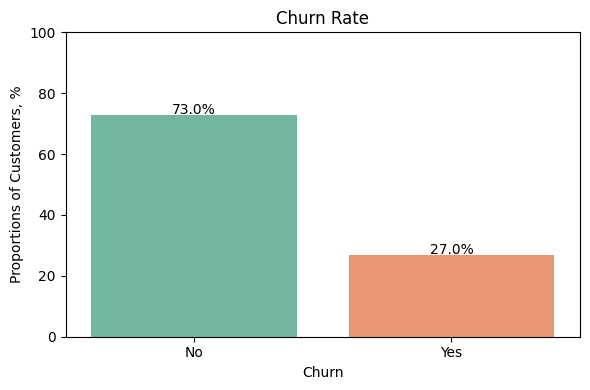

In [19]:
df_stat= df_train['churn'].value_counts(normalize=True).round(2)*100
df_stat=df_stat.rename(index={0: 'No', 1:'Yes'})
percentage=df_stat.values 
plt.figure(figsize=(6, 4), dpi=100)
ax = sns.barplot(x=df_stat.index, y=df_stat.values, palette="Set2")
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.ylim(0, 100)
plt.title('Churn Rate')
plt.xlabel('Churn')
plt.ylabel('Proportions of Customers, %')
plt.tight_layout()
plt.show()

### Studying Correlations
### Looking for Correlations in Numerical Attributes

In [20]:
corr_matrix= df_train.corr()
corr_matrix

,tenure,monthlycharges,totalcharges,churn
tenure,1.000000,0.256700,0.829433,-0.345593
monthlycharges,0.256700,1.000000,0.653969,0.198040
totalcharges,0.829433,0.653969,1.000000,-0.194814
churn,-0.345593,0.198040,-0.194814,1.000000


- These coefficients are by default pearson : standard correlation coefficient, they take values between -1 and +1. 
Positive and negatives signs indicates positive and negative associations. Coeffients closer to zero indicate weak association $^2$.
We see that **tenure** and **totalcharges** are highly correlated. Lets only look at features, their correlation matrix with heatmap. 

<AxesSubplot:>

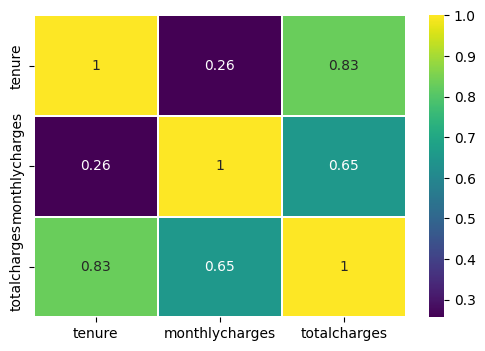

In [21]:
plt.figure(figsize=(6,4), dpi=100)
sns.heatmap(df_train.drop('churn',axis=1).corr(), cmap='viridis', annot=True, linewidth=0.2)

- The heatmap shows that the brighter the color is more positive the association, the darker the color is
more negative the association. The correlation threshold is arbitrary and may need to be raised or lowered depending on the problem and the models to be used$^{3}$. 


- It is suggested for the models sensitive to between-predicter correlations,
a threshold of 0.75 might be applied$^{4}$. 


- As seen from the heatmap, the correlation 0.83  must be taken care of for tenure and totalcharges. Let`s drop one of these predictors, in this case the totalcharges. Lets make an empty drop_cols list and append 'totalcharges' to the list.


In [22]:
drop_cols=[]
drop_cols.append('totalcharges')

### Relationship between the Numerical variables and Label (Churn)

In [23]:
#Correlation of each attribute with churn
corr_matrix['churn'].sort_values(ascending=False)

churn             1.000000
monthlycharges    0.198040
totalcharges     -0.194814
tenure           -0.345593
Name: churn, dtype: float64

- Let's look at the  relationship between the churn rate and these variables.

### Tenure and Churn Rate 

In [24]:
def group_tenure(tenure):
    if tenure < 2:
        return '0-2 Months'
    elif tenure < 13:
        return '3-12 Months'
    else:
        return 'Over 12 Months'

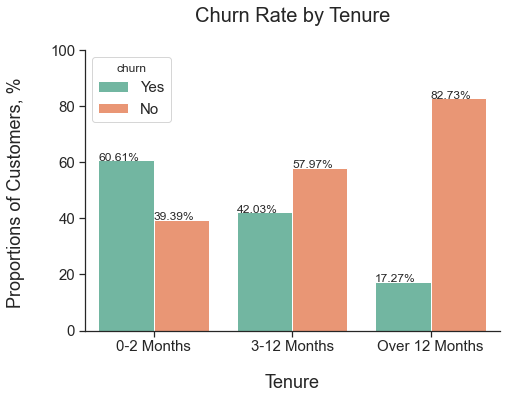

In [25]:
df_train['tenuregroup']=df_train['tenure'].apply(group_tenure)
df_tenure = df_train.groupby('tenuregroup')['churn'].value_counts(normalize=True).mul(100)
df_tenure = df_tenure.rename('percent').reset_index()
df_tenure['churn'].replace({0:'No', 1:'Yes'}, inplace=True)
order=['0-2 Months', '3-12 Months','Over 12 Months']

sns.set_theme(style="ticks")
g = sns.catplot(x='tenuregroup',y='percent',hue='churn',kind='bar', order=order, data=df_tenure, aspect=1.2, height=6, legend=False,palette="Set2")
g.ax.set_ylim(0,100)

plt.title('Churn Rate by Tenure\n ',fontsize=20)
plt.xlabel('Tenure\n',fontsize=18, labelpad=20)
plt.ylabel('Proportions of Customers, % \n',fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15, loc='upper left', title='churn')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    
plt.tight_layout()
plt.show()

- **tenure** variable has a high negative correlation, the newer the customer to the company, higher the churn rate.

### Monthlycharges and Churn Rate

In [26]:
def group_mc(monthlycharges):
    if monthlycharges < 21:
        return '0-20'
    elif monthlycharges < 51:
        return '20-50'
    else:
        return 'Over 50'

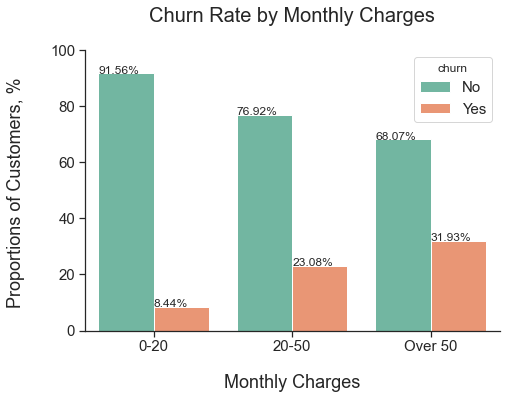

In [27]:
df_train['monthlychargesgroup']=df_train['monthlycharges'].apply(group_mc)
df_monthlycharges = df_train.groupby('monthlychargesgroup')['churn'].value_counts(normalize=True).mul(100)
df_monthlycharges = df_monthlycharges.rename('percent').reset_index()
df_monthlycharges['churn'].replace({0:'No', 1:'Yes'}, inplace=True)
order=['0-20', '20-50','Over 50']

sns.set_theme(style="ticks")
g = sns.catplot(x='monthlychargesgroup',y='percent',hue='churn',kind='bar', order=order, data=df_monthlycharges, aspect=1.2, height=6, legend=False,palette="Set2")
g.ax.set_ylim(0,100)

plt.title('Churn Rate by Monthly Charges\n ',fontsize=20)
plt.xlabel('Monthly Charges\n',fontsize=18, labelpad=20)
plt.ylabel('Proportions of Customers, % \n',fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15, loc='upper right', title='churn')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    
plt.tight_layout()
plt.show()

- Churn Rate is higher for the higher monthly charges as the positive correlation coefficient indicates.

#### Drop the added columns created for grouping

In [28]:
df_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn',
       'tenuregroup', 'monthlychargesgroup'],
      dtype='object')

In [29]:
df_train= df_train.drop(['tenuregroup','monthlychargesgroup'], axis=1)

### Feature importance in Categorical Attributes

In [30]:
#Since the customorid is not a predictor, lets save and drop it
customerID_train = df_train['customerid']
df_train= df_train.drop('customerid', axis=1)

In [31]:
cat_cols=df_train.select_dtypes(include= 'object').columns.tolist()
df_train[cat_cols].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [32]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score (series, df_train['churn'])

- A good way of determining important feature is to calculate Mutual information that measures the degree of (in) dependence between a category and  the target. The higher the mutual information value is the more important is the feature$^1$.

In [33]:
df_mi=df_train[cat_cols].apply(calculate_mi)
df_mi=df_mi.sort_values(ascending=False). to_frame(name="MI")
df_mi


,MI
contract,0.098853
onlinesecurity,0.066099
techsupport,0.063823
internetservice,0.057011
onlinebackup,0.047476
paymentmethod,0.046861
deviceprotection,0.043627
streamingmovies,0.032325
streamingtv,0.032053
paperlessbilling,0.020481


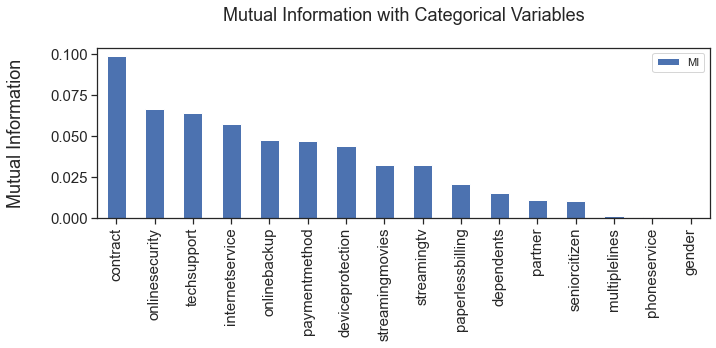

In [34]:
df_mi.plot(kind="bar", figsize=(10,5,))
plt.title('Mutual Information with Categorical Variables\n', fontsize=18)
plt.ylabel('Mutual Information\n',fontsize=18)
plt.tick_params(labelsize=15)
plt.tight_layout()
plt.show()

- Lets add the features with mi less than 0.01 to the the drop list to simplify the model to prevent overfitting.

In [35]:
drop_cols.extend(['multiplelines','gender', 'phoneservice'])

- From the Mutual information above lets take first seven categorial variable with the highest MI values, another words 
the seven most important categorical feature and visualize them together with the numerical variables looking at 
the correlations to see, overall what variables are the most important predictors.

In [36]:
cats=df_train[cat_cols].apply(calculate_mi).sort_values(ascending=False).keys().to_list()[0:7]
nums=['tenure', 'monthlycharges', 'churn']
df_cats= pd.get_dummies(df_train[cats])
df_nums=df_train[nums]
corr=pd.concat([df_nums, df_cats], axis=1).corr()['churn'].sort_values(ascending=False)
corr = corr[corr!=1]

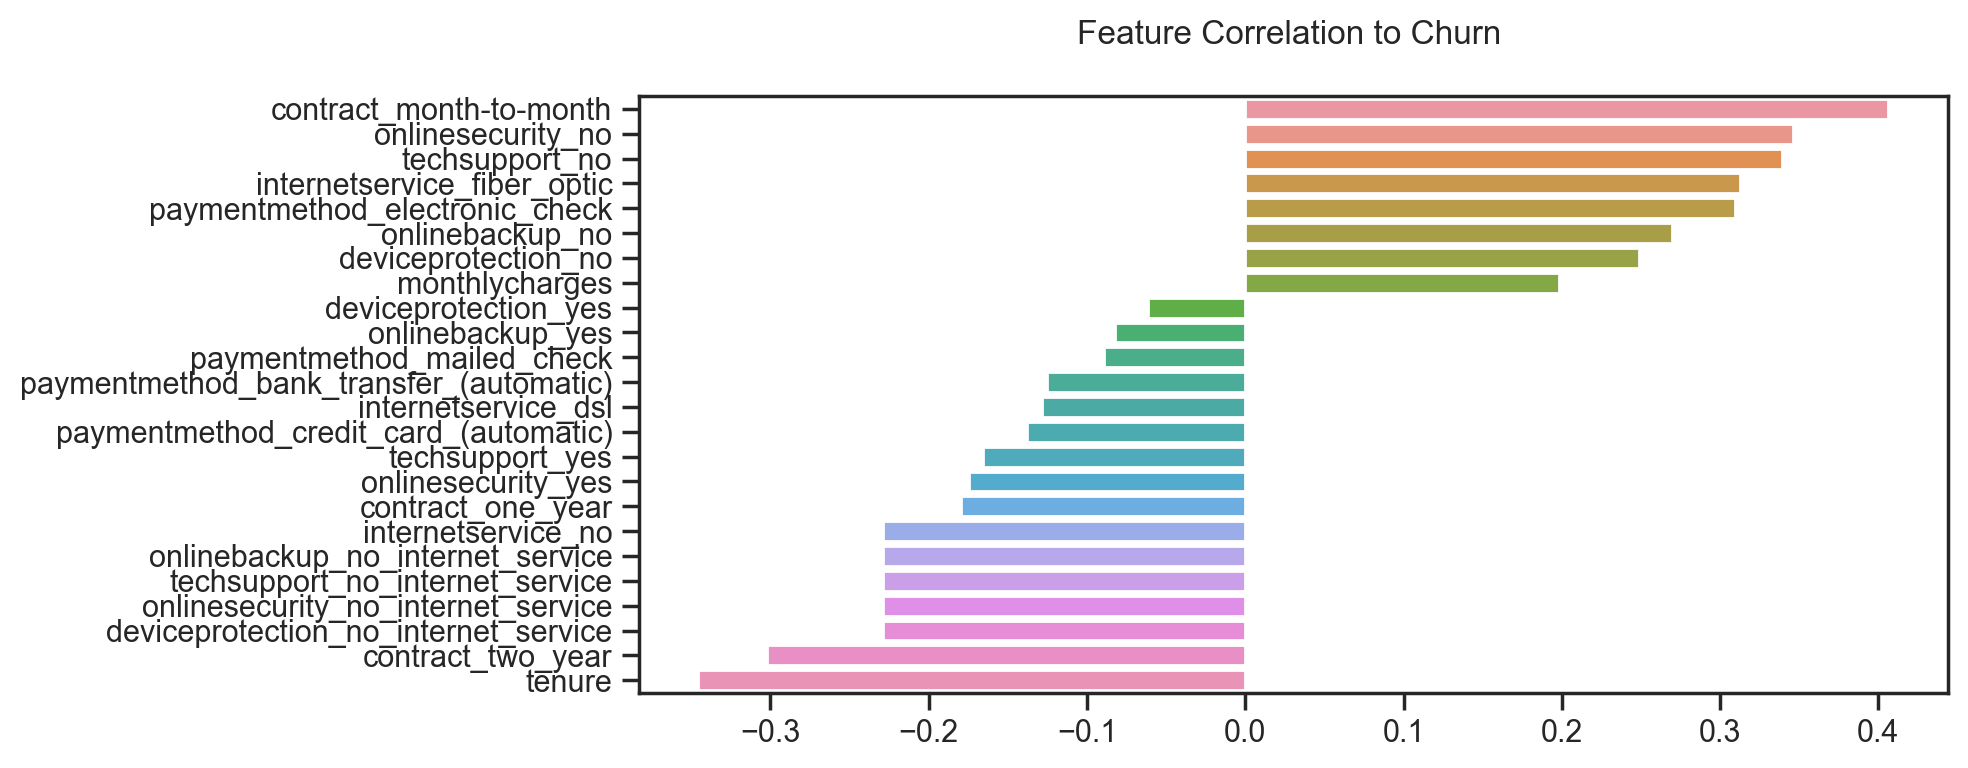

In [37]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(y=corr.index, x=corr.values)
plt.title('Feature Correlation to Churn \n')
#plt.xticks(rotation=90);
plt.tight_layout()
plt.show()

### Insights from  the Feature Correlation
 Some of the top positive correlations suggest that, the customers below have higher tendency to churn:
  - they have month to month contract type
  - they don't have online security enabled
  - they don't have tech support
  - they have fiber-optic internet service
  - they pay with electronic check.
  
<br>
Some of the top negative correlations suggest that, the customers below have higher tendency to stay with the company (not to churn):

  - they are tenure
  - they have two-year contract type
  - they don't have internet service.
  

Lets look at closer to several of these variables to verify the observations above.

### Churn Rate by Contract Type

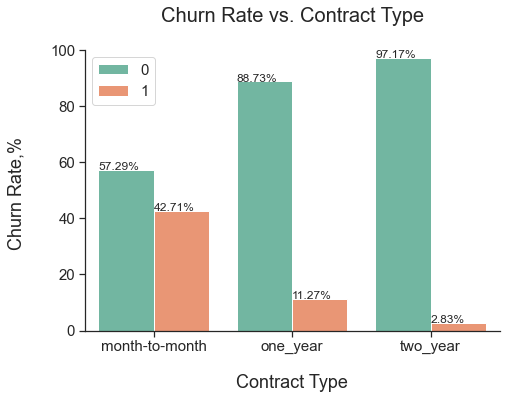

In [38]:
x,y = 'contract', 'churn'

df_temp = df.groupby(x)[y].value_counts(normalize=True)
df_temp = df_temp.mul(100)
df_temp = df_temp.rename('percent').reset_index()

sns.set_theme(style="ticks")
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df_temp, aspect=1.2, height=6, palette= 'Set2',legend=False)
g.ax.set_ylim(0,100)

plt.title('Churn Rate vs. Contract Type\n ',fontsize=20)
plt.xlabel('Contract Type\n',fontsize=18, labelpad=20)
plt.ylabel('Churn Rate,% \n',fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15, loc='upper left')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    
plt.tight_layout()
plt.show()
   

-  Contract type is highly correlated with the churn rate. While only less than 3% of the customers with two year contract churned, about 43% of the customers with month to month contract churned.

### Churn Rate by Onlinesecurity Type

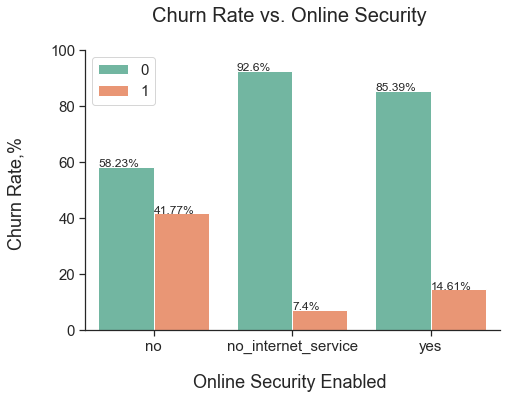

In [39]:
x,y = 'onlinesecurity', 'churn'

df_temp = df.groupby(x)[y].value_counts(normalize=True)
df_temp = df_temp.mul(100)
df_temp = df_temp.rename('percent').reset_index()

sns.set_theme(style="ticks")
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df_temp, aspect=1.2, height=6, palette= 'Set2',legend=False)
g.ax.set_ylim(0,100)

plt.title('Churn Rate vs. Online Security \n ',fontsize=20)
plt.xlabel('Online Security Enabled \n',fontsize=18, labelpad=20)
plt.ylabel('Churn Rate,% \n',fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15, loc='upper left')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    
plt.tight_layout()
plt.show()
   



-  While about 14% of the customers with enabled online security churned, about 42% of the customers with no online security churned.

### Churn Rate by Tech Support

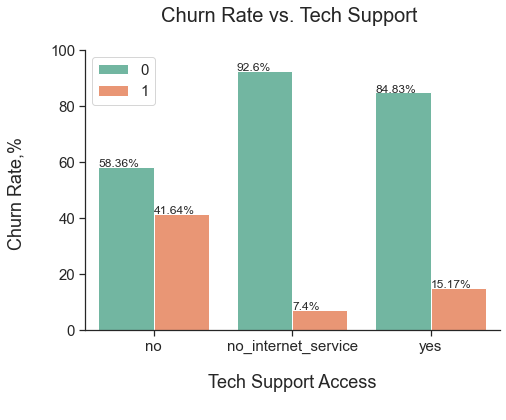

In [40]:
x,y = 'techsupport', 'churn'

df_temp = df.groupby(x)[y].value_counts(normalize=True)
df_temp = df_temp.mul(100)
df_temp = df_temp.rename('percent').reset_index()

sns.set_theme(style="ticks")
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df_temp, aspect=1.2, height=6,palette= 'Set2', legend=False)
g.ax.set_ylim(0,100)

plt.title('Churn Rate vs. Tech Support \n ',fontsize=20)
plt.xlabel('Tech Support Access\n',fontsize=18, labelpad=20)
plt.ylabel('Churn Rate,% \n',fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15, loc='upper left')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    
plt.tight_layout()
plt.show()
   



-  While about 16% of the customers with tech support churned, about 42% of the customers with tech support churned.

## 6. Data Preparation for Machine Learning Algorithms   

### Separate the Predictors and the Label¶
First, separate the data for X and y, predictors and target, respectively.


In [41]:
X = df_train.drop('churn', axis=1) #Feature data frame
y= df_train['churn'] #target

### Data Cleaning
#### Drop the previously chosen columns, drop_cols

In [42]:
X.drop(drop_cols, axis=1, inplace=True)

###  Creating Tranformation Pipelines

In [43]:
# Separate the feature data into numerical and categorical sections
X_num= X.select_dtypes(include= 'number')
X_cat= X.select_dtypes(include= 'object')
num_attribs=list(X_num)
cat_attribs=list(X_cat)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#### Pipeline for Numerical Features

In [45]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

#### Pipeline for Categorical Features
- We will convert them to numeric using onehot encoding below.

In [46]:
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])

### Full Preprocessing Pipeline 

In [47]:
from sklearn.compose import ColumnTransformer

In [48]:
full_preprocessing =ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline,cat_attribs),
])

## 7.  Training and  Evaluation of a Shortlist of Promising Models


In [49]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score


### Model Training

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [51]:
log_reg= Pipeline([
    ('pre',full_preprocessing),
    ('log_reg', LogisticRegression(solver='liblinear', random_state=42))]
)

In [52]:
rbf_svm= Pipeline([
    ('pre',full_preprocessing),
    ('rbf_svm', SVC(kernel='rbf', random_state=42))]
)

In [53]:
rf = Pipeline([
    ('pre',full_preprocessing),
    ('rf',RandomForestClassifier(n_jobs=-1, random_state=42) )]
)

In [54]:
ada = Pipeline([
    ('pre',full_preprocessing),
    ('ada',AdaBoostClassifier(random_state=42) )]
)

### A quick look for each model

In [55]:
models = []
models.append(('Logistic Regression', log_reg))
models.append(('Kernel SVM', rbf_svm))
models.append(('Random Forests', rf))
models.append(('AdaBoost',ada))

In [56]:
names=[]
scores_list = []

for name, model in models:
    scores= cross_validate(model, X, y, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=True)
    mean_scores= (pd.DataFrame(scores).mean().round(2))
    scores_list.append(mean_scores)
    names.append(name)
    
    print(name)
    print(mean_scores,'\n')

Logistic Regression
fit_time          0.14
score_time        0.05
test_accuracy     0.80
train_accuracy    0.80
test_roc_auc      0.84
train_roc_auc     0.85
dtype: float64 

Kernel SVM
fit_time          1.90
score_time        1.08
test_accuracy     0.80
train_accuracy    0.82
test_roc_auc      0.80
train_roc_auc     0.86
dtype: float64 

Random Forests
fit_time          1.71
score_time        0.20
test_accuracy     0.78
train_accuracy    1.00
test_roc_auc      0.81
train_roc_auc     1.00
dtype: float64 

AdaBoost
fit_time          0.60
score_time        0.14
test_accuracy     0.80
train_accuracy    0.81
test_roc_auc      0.84
train_roc_auc     0.86
dtype: float64 



- Based on the train accuracy values the Random Forest is perfectly overfitting.
Kernel SVM is also overfitting. To deal with the overfitting we must try to simplify the models. 
Below we will optimize the models to choose the best parameters.

### Optimizing the models

In [57]:
param_grid=[{'log_reg__penalty': ['l1','l2'], 'log_reg__C': [0.001,0.01,0.1,1,10,100,1000]},
            {'rbf_svm__gamma': [0.001, 0.0001], 'rbf_svm__C': [0.001,0.01,0.1,1,10,100,1000]},
            [{'rf__n_estimators':[3,10,30], 'rf__max_features': [2,4,6,8]}, 
            {'rf__bootstrap': [False],'rf__n_estimators':[3,10], 'rf__max_features': [2,3,4]},],
           {'ada__n_estimators': [3,10,30,100,200], 'ada__learning_rate': [0.01, 0.05, 0.1, 1]}]

In [58]:
params=[]
estimators=[]

for (name, model), param_grid in zip(models, param_grid):
    grid_search=GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X, y);
    param= grid_search.best_params_
    estimator= grid_search.best_estimator_
    params.append(param)
    estimators.append(estimator)


In [59]:
best_params= dict(zip(names, params)) 
best_estimators=dict(zip(names, estimators)) 
best_estimators_list=list(zip(names, estimators)) 
print(best_params)

{'Logistic Regression': {'log_reg__C': 1, 'log_reg__penalty': 'l1'}, 'Kernel SVM': {'rbf_svm__C': 1000, 'rbf_svm__gamma': 0.0001}, 'Random Forests': {'rf__max_features': 8, 'rf__n_estimators': 30}, 'AdaBoost': {'ada__learning_rate': 0.05, 'ada__n_estimators': 200}}


In [60]:
names=[]
scores_list = []
accuracy_std=[]
roc_auc_std=[]

for name, model in best_estimators_list:
    scores= cross_validate(model, X, y, cv=5, scoring=['accuracy', 'roc_auc', 'precision', 'recall', 'f1'], return_train_score=False)
    mean_scores= (pd.DataFrame(scores).mean().round(2)).to_dict()
    scores_list.append(mean_scores)
    acc_std= scores['test_accuracy'].std().round(3)
    auc_std=scores['test_roc_auc'].std().round(3)
    names.append(name)
    accuracy_std.append(acc_std)
    roc_auc_std.append(auc_std)

In [61]:
results= pd.DataFrame(scores_list)
results.index= names
results['accuracy_std']=accuracy_std
results['roc_auc_std']=roc_auc_std
results=results.sort_values(by=['test_roc_auc'], ascending=False)
results

,fit_time,score_time,test_accuracy,test_roc_auc,test_precision,test_recall,test_f1,accuracy_std,roc_auc_std
AdaBoost,1.93,0.41,0.80,0.85,0.67,0.49,0.57,0.010,0.016
Logistic Regression,0.16,0.05,0.80,0.84,0.66,0.55,0.60,0.014,0.014
Kernel SVM,1.86,1.20,0.80,0.84,0.65,0.54,0.59,0.013,0.011
Random Forests,0.36,0.10,0.78,0.80,0.61,0.48,0.54,0.013,0.011


- Normally, the best model is the one with the highest roc_auc value. Here, we have an interesting situation for the AdaBoost and Logistic regression. In this business problem since 
our goal is to send promotions to the customers only who are going to churn, we must determine not only
how many people will actually going to churn (precision) but also we don`t want to fail to identify churning customers by 
predicting false negatives. The better the recall, fewer false negatives we have $^1$.

- AdaBoost has the highest **roc_auc**  and the **precision**, but lower **recall**  than  Logistic Regression and lower **f1** score. It is also slower than the Logistic Regression. We must choose whichever is the best for our business problem. In this case the roc_auc value is high for AdaBoost, but because the roc_auc value is the area under the curve (True Positive Rate vs False Positive Rate), the high area most likely comes from large false positives. Therefore, the Logistic Regression is the best model for our case.

### Model Evaluation on Training Data

In [62]:
from sklearn.model_selection import cross_val_predict

In [63]:
final_clf= best_estimators['Logistic Regression']

In [64]:
y_pred= cross_val_predict(final_clf, X, y, cv=5)

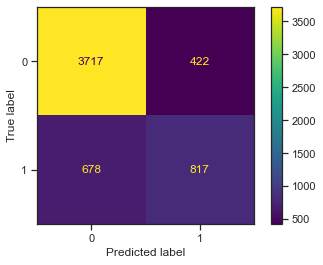

In [65]:
cm=confusion_matrix(y,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis') 
plt.grid(False)
plt.show()

In [66]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4139
           1       0.66      0.55      0.60      1495

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.80      0.80      0.80      5634



- Precision, the accuracy of the positive prediction is 66%. Another words, only 66% of the postive predictions
turned out to be correct.
- Recall, the positive rate, the ratio of positive instances that are correctly detected, here only 55%.
- F1 score is the harmonic mean of the precision and recall.

In [67]:
from sklearn.metrics import RocCurveDisplay

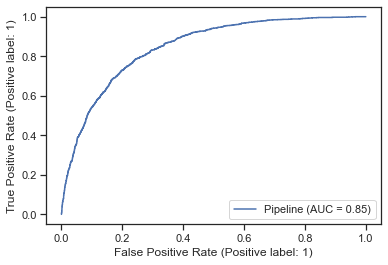

In [68]:
RocCurveDisplay.from_estimator(final_clf, X, y)
plt.show()


## 8. Testing the Model Performance

#### Prepare the test data

In [69]:
customerID_test = df_test['customerid']
df_test= df_test.drop('customerid', axis=1)

In [70]:
X_test= df_test.drop('churn', axis=1) #Feature data frame
y_test= df_test['churn'] #target
X_test.drop(drop_cols, axis=1, inplace=True)

In [71]:
final_pred=final_clf.predict(X_test)

In [72]:
#probability score
final_pred_probs = final_clf.predict_proba(X_test)
final_pred_probs  = final_pred_probs [:, 1]
final_pred_probs

array([0.03037779, 0.67052208, 0.06001675, ..., 0.14760562, 0.00963113,
       0.00735142])

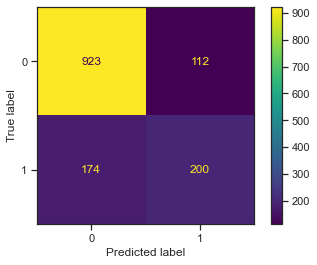

In [73]:
cm=confusion_matrix(y_test,final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis') 
plt.grid(False)
plt.show()

In [74]:
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



### Final Report

In [75]:
final_results = pd.concat([customerID_test, y_test], axis = 1)
final_results['predictions']= final_pred
final_results["probability_to_churn_percent"] = (final_pred_probs*100).round(2)

In [76]:
final_results=final_results.sort_values(by=['probability_to_churn_percent'], ascending=False)
final_results

,customerid,churn,predictions,probability_to_churn_percent
3380,5178-lmxop,1,1,84.70
2397,3722-wpxtk,1,1,82.46
642,0970-etwge,1,1,82.38
352,4115-nzrks,0,1,82.33
2631,6861-xwtwq,1,1,82.18
...,...,...,...,...
984,8165-zjrnm,0,0,0.48
6614,4086-witjg,0,0,0.48
3649,0174-qrvvy,0,0,0.47
5804,1555-hapsu,0,0,0.47


In [77]:
def group(probability_to_churn_percent):
    if probability_to_churn_percent >= 80 :
        return 'high'
    elif probability_to_churn_percent < 60:
        return 'low'
    else:
        return 'medium'

final_results['Risk']=final_results['probability_to_churn_percent'].apply(group)
final_results

,customerid,churn,predictions,probability_to_churn_percent,Risk
3380,5178-lmxop,1,1,84.70,high
2397,3722-wpxtk,1,1,82.46,high
642,0970-etwge,1,1,82.38,high
352,4115-nzrks,0,1,82.33,high
2631,6861-xwtwq,1,1,82.18,high
...,...,...,...,...,...
984,8165-zjrnm,0,0,0.48,low
6614,4086-witjg,0,0,0.48,low
3649,0174-qrvvy,0,0,0.47,low
5804,1555-hapsu,0,0,0.47,low


## 9. Model Deployment

#### Saving the Model

In [78]:
import joblib

In [79]:
final_model_churn=final_clf

In [80]:
joblib.dump(final_model_churn, 'final_model_churn.pkl')

['final_model_churn.pkl']

## 10. Conclusions

The customers;
- with monthly contract type,
- new to the company (not a tenure),
- who has internet but don't have online security or/and tech support.
- with fiber optic internet service

have high risk to churn. How much each of these variable effects the decision is determined by the final model. Our final model predicts whether a customers have the risk of default with an accuracy score of 80%.